In [505]:
import h5py
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [374]:
data = h5py.File('data/Q1/MNIST_Subset.h5','r+')
X=data['X'][:]
Y=data['Y'][:]

In [375]:
X.shape,Y.shape

((14251, 28, 28), (14251,))

In [376]:
X = X.reshape(X.shape[0],-1)

In [377]:
X=X/255

In [378]:
np.unique(Y)

array([7, 9], dtype=uint8)

In [379]:
#as we only have 2 classes
Y = np.where(Y==7,0,1)

In [380]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [381]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((11400, 784), (2851, 784), (11400,), (2851,))

In [382]:
def one_hot_encoding(Y):
    n_classes = len(np.unique(Y))
    Y=Y.reshape(1,Y.shape[0])
    Y_new = np.eye(n_classes)[Y.astype('int32')]
    Y_new = Y_new.T.reshape(n_classes, Y.shape[1])
    return Y_new,n_classes
#     targets = Y.reshape(-1)
#     return np.eye(n_classes)[targets]

In [383]:
Y_train,n_classes = one_hot_encoding(Y_train)
Y_test,n_classes=one_hot_encoding(Y_test)

In [384]:
Y_train.shape,Y_test.shape

((2, 11400), (2, 2851))

In [385]:
X_train=X_train.T
X_test=X_test.T

In [386]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((784, 11400), (784, 2851), (2, 11400), (2, 2851))

In [547]:
def relu(z,derative = False):
    if derative:
        z[z<=0]=0
        z[z>0]=1
        return z
    z[z<0]=0
    return z

In [528]:
def sigmoid(z,derative = False):
    if derative:
        return z*(1-z)
    return 1.0/(1.0+np.exp(-z))

In [529]:
def softmax(z):
    return np.exp(z)/np.sum(np.exp(z),axis=0)

In [538]:
def compute_multiclass_loss(Y, Y_hat):
    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    return -(1/m) * L_sum

In [531]:
def init_weights(n_hidden_layers, number_of_neurons):
    weights_layers =[np.random.uniform(size=(number_of_neurons[0],X_train.shape[0]))]
    bias_layers = [np.random.uniform(size=(number_of_neurons[0],1))]
    
    for i in range(1,n_hidden_layers):
        weights_layers.append(np.random.uniform(size=(number_of_neurons[i],weights_layers[i-1].shape[0])))
        bias_layers.append(np.random.uniform(size=(number_of_neurons[i],1)))
    
    weights_layers.append(np.random.uniform(size=(n_classes,weights_layers[-1].shape[0])))
    bias_layers.append(np.random.uniform(size=(n_classes,1)))
    
    return weights_layers,bias_layers

In [552]:
def train_neural_network(X_train,Y_train,epoch,learning_rate,hidden_layer_activation=sigmoid):
    global weight_layers
    global bias_layers
    
    cost=[]
    number_of_samples = X_train.shape[1]

    
    #------epoch start here----------
    while epoch>0:
        print(epoch)

        input_layers = [X_train]
        output_layers=[X_train]

        delta_weights = []
        delta_bias = []


        for weight,bias in zip(weight_layers[:-1],bias_layers[:-1]):
            print(output_layers[-1])
            input_layers.append(np.dot(weight,output_layers[-1])+bias)
            output_layers.append(hidden_layer_activation(input_layers[-1]))



        input_layers.append(np.dot(weight_layers[-1],output_layers[-1])+bias_layers[-1])
        output_layers.append(softmax(input_layers[-1]))
        
        
        cost.append(compute_multiclass_loss(Y_train,output_layers[-1]))
        

        #------Output layer error --------
        error = output_layers[-1] - Y_train

        delta_weights.append((1./number_of_samples)*np.dot(error,output_layers[-2].T))
        delta_bias.append((1./number_of_samples)*np.sum(error, axis=1, keepdims=True))

        #-----hidden layer stuff

        for i in range(len(input_layers)-1)[:0:-1]:

            error = np.dot(weight_layers[i].T,error)
            delta_z = error*hidden_layer_activation(input_layers[i],derative=True)
            delta_weights.insert(0,(1./number_of_samples)*np.dot(delta_z,output_layers[i-1].T))
            delta_bias.insert(0,(1./number_of_samples)*np.sum(error,axis=1,keepdims=True))

        for i in range(len(weight_layers)):
            delta_weights[i][np.isnan(delta_weights[i])] = 0.0
            weight_layers[i]=weight_layers[i]-learning_rate*delta_weights[i]
            bias_layers[i]=bias_layers[i]-learning_rate*delta_bias[i]
        
        epoch-=1

    return cost

In [553]:
#hyperparameters
epoch = 10
learning_rate = 0.01

In [554]:
weight_layers,bias_layers = init_weights(2,[100,50])

In [555]:
cost = train_neural_network(X_train,Y_train,epoch,learning_rate,hidden_layer_activation=relu)

10
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[33.23899307 32.91979242 45.65763143 ... 35.48546255 56.81129068
  44.0950028 ]
 [40.29417154 32.48007798 47.55020084 ... 37.35772155 68.35764809
  46.10603029]
 [41.81382695 34.67011615 51.77188589 ... 40.11093703 66.81150155
  48.4958803 ]
 ...
 [42.16018804 37.84581594 53.5931059  ... 41.62182764 67.86973524
  49.95075217]
 [39.05341941 33.94189352 52.23720428 ... 37.86036412 66.20668837
  49.47653172]
 [39.52441355 34.84487448 53.24086429 ... 40.17134404 67.36344715
  48.76441296]]
9
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/hitkul/anaconda3/envs/ml_ass/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hitkul/anaconda3/envs/ml_ass/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/hitkul/anaconda3/envs/ml_ass/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
/home/hitkul/anaconda3/envs/ml_ass/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less_equal
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hitkul/anaconda3/envs/ml_ass/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
8
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
7
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
6
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 

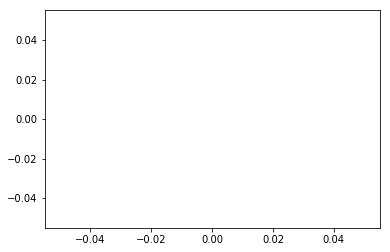

In [536]:
plt.plot(range(len(cost[1:])),cost[1:])

In [537]:
cost

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]